<a href="https://colab.research.google.com/github/a-nagar/vistra-intermediate/blob/main/Intermediate_Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/unemp.csv")

In [ ]:
df

,pce,pop,psavert,uempmed,unemploy
0,506.7,198712.000,12.6,4.5,2944
1,509.8,198911.000,12.6,4.7,2945
2,515.6,199113.000,11.9,4.6,2958
3,512.2,199311.000,12.9,4.9,3143
4,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...
569,12062.0,319746.157,7.6,12.9,8717
570,12046.0,319928.646,7.7,13.2,8903
571,12082.4,320074.511,7.9,12.9,8610
572,12158.3,320230.786,7.4,12.0,8504


# Meaning of variables:

pce = personal consumption expenditures, in billions of dollars

pop = total population, in thousands

psavert = personal savings rate

uempmed = 	median duration of unemployment, in weeks

unemploy = number of unemployed in thousands

## Histogram Plot

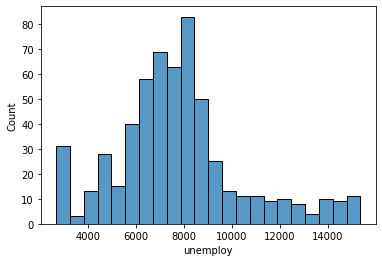

In [ ]:
sns.histplot(df['unemploy'])

# Line Plot

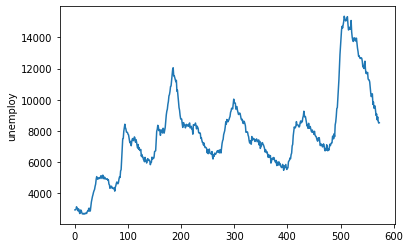

In [ ]:
sns.lineplot(x = df.index, y = df['unemploy'])

## Creating a prediction model

Suppose we want to predict unemploy as a function of other variables. The model could be as:

unemploy = w0 + w1 * (pce) + w2 * (pop) + w3 * (psavert) + w4 * (unempd)

where all w's are unknown

i will tell the library to find best w's that minimize error + don't cause overfitting


In [ ]:
df

,pce,pop,psavert,uempmed,unemploy
0,506.7,198712.000,12.6,4.5,2944
1,509.8,198911.000,12.6,4.7,2945
2,515.6,199113.000,11.9,4.6,2958
3,512.2,199311.000,12.9,4.9,3143
4,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...
569,12062.0,319746.157,7.6,12.9,8717
570,12046.0,319928.646,7.7,13.2,8903
571,12082.4,320074.511,7.9,12.9,8610
572,12158.3,320230.786,7.4,12.0,8504


In [ ]:
print(df.shape)
df.describe() # what does this command do?

(574, 5)


,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df_transformed = pd.DataFrame(sc.fit_transform(df))

In [ ]:
df_transformed.describe()  # range of data changes -> becomes a normal distribution with mean = 0 and sd = 1

,0,1,2,3,4
count,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02
mean,4.951517e-17,-7.922428e-16,-2.970910e-16,3.466062e-16,-1.485455e-16
std,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00
min,-1.213774e+00,-1.594733e+00,-2.149938e+00,-1.123236e+00,-1.926883e+00
25%,-9.122292e-01,-8.803076e-01,-7.317835e-01,-6.357955e-01,-5.634483e-01
50%,-2.485414e-01,-1.118582e-01,-5.647204e-02,-2.702152e-01,-1.050554e-01
75%,7.896641e-01,9.039756e-01,8.551985e-01,1.197371e-01,3.463291e-01
max,2.074936e+00,1.725563e+00,2.948664e+00,4.043632e+00,2.871847e+00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()
df_mm = pd.DataFrame(mm.fit_transform(df), columns = df.columns)

In [ ]:
df_mm.describe()  # makes every attribute in range [0, 1]

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.369073,0.480298,0.421672,0.217392,0.401540
std,0.304336,0.301441,0.196303,0.193710,0.208570
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091691,0.215169,0.278146,0.094340,0.284124
50%,0.293499,0.446609,0.410596,0.165094,0.379648
75%,0.609187,0.752556,0.589404,0.240566,0.473711
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pce       574 non-null    float64
 1   pop       574 non-null    float64
 2   psavert   574 non-null    float64
 3   uempmed   574 non-null    float64
 4   unemploy  574 non-null    float64
dtypes: float64(5)
memory usage: 22.5 KB


In [ ]:
X = df_mm[['pce', 'pop', 'psavert', 'uempmed']]

In [ ]:
y = df_mm['unemploy']

In [ ]:
X

,pce,pop,psavert,uempmed
0,0.000000,0.000000,0.688742,0.023585
1,0.000265,0.001635,0.688742,0.033019
2,0.000762,0.003295,0.642384,0.028302
3,0.000471,0.004922,0.708609,0.042453
4,0.000916,0.006459,0.701987,0.033019
...,...,...,...,...
569,0.988723,0.994608,0.357616,0.419811
570,0.987354,0.996108,0.364238,0.433962
571,0.990468,0.997306,0.377483,0.419811
572,0.996962,0.998591,0.344371,0.377358


In [ ]:
y

0      0.020447
1      0.020526
2      0.021552
3      0.036157
4      0.030078
         ...   
569    0.476198
570    0.490882
571    0.467751
572    0.459383
573    0.461119
Name: unemploy, Length: 574, dtype: float64

In [ ]:
# X -> predictors / attributes / features
# y -> predicted
# train-test split is done  to get 2 separate dataframes
# i will not show the testing data to my model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(401, 4)
(173, 4)


In [ ]:
# 2 approaches
# approach 1: No overfitting avoidance
lr = LinearRegression()
lr.fit(X_train, y_train)  # lr is the trained model

LinearRegression()

In [ ]:
lr.coef_

array([-1.53219329,  1.65052461,  0.21860231,  0.95772098])

In [ ]:
lr.intercept_

-0.12710992039783686

In [ ]:
# unemp = -0.5970338085553475 - 1.44249605 * (pce) + 1.5627215 * (pop) + 0.20900517 * psavert + 0.94963013 * uempmed

# unemp and pce vary in reverse direction with a weight of - 1.44249605
# unemp and pop vary in same direction with a weight of 1.5627215
#..
# model has been built using training data
# we need to evaluate this on testing data

lr.predict(X_test)

array([0.46043303, 0.04074317, 0.6490005 , 0.49875429, 0.05999024,
       0.42816864, 0.35548269, 0.38994078, 0.29611805, 0.32362455,
       0.03817016, 0.36465648, 0.31183232, 0.46047275, 0.3273371 ,
       0.35191741, 0.24976549, 0.57482692, 0.83829534, 0.45683429,
       0.50653753, 0.21593208, 0.34994128, 0.04603837, 0.32130081,
       0.08601444, 0.34280705, 0.32357512, 0.34750658, 0.40692028,
       0.49174565, 0.50064441, 0.22930509, 0.44434246, 0.27899186,
       0.39487696, 0.30087977, 0.22275679, 0.4584424 , 0.47791774,
       0.45543478, 0.25305074, 0.53463265, 0.26323479, 0.40699024,
       0.04586064, 0.39384826, 0.32440891, 0.35478328, 0.40370746,
       0.32259939, 0.41033933, 0.23638962, 0.36861309, 0.76347307,
       0.32041113, 0.45533691, 0.46790103, 0.35015352, 0.21562766,
       0.28899605, 0.3883213 , 0.6688288 , 0.49368206, 0.45999471,
       0.54159235, 0.45076495, 0.28332661, 0.2988065 , 0.45608109,
       0.35163962, 0.47368432, 0.80215591, 0.48631353, 0.11434

In [ ]:
y_test

330    0.370253
16     0.002368
559    0.605037
438    0.448804
15     0.000316
         ...   
473    0.321860
396    0.241730
418    0.451093
82     0.159469
146    0.276703
Name: unemploy, Length: 173, dtype: float64

In [ ]:
print("Training Dataset Predictions below")
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))
print("Test Dataset Predictions below")
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

Training Dataset Predictions below
0.07787324369458129
0.8643441807823631
Test Dataset Predictions below
0.08248007987887074
0.8316156967087421


Test error is 8.24%. 

Are you OK with this error?
True bill = 100, my prediction would be in the range 100 +/- 8.24
(91.76 - 108.24)

- Assumed a linear relationship (may not be true)
  2000 sq ft - 500,000
  4000 sq ft - 1,000,000

- ML: is not an exact science.
  you have to try various things e.g. add more variables, adding more training data

In [ ]:
# approach 2: overfitting avoidance
rr = Ridge(alpha=0.2) # Ridge -> sq of weights, alpha = the multiplication factor

In [ ]:
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))


0.08168287841889631
0.8507466920484033


In [ ]:
# testing accuracy improves
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.08429912063303033
0.8241065986547377


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
df['medv'] = boston.target

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# which 2 or 3 attributes seem most closely correlated (ignore +/- sign) with the medv variable?
df_new = df[['LSTAT', 'RM', 'NOX', 'INDUS', 'CRIM', 'medv' ]]

In [ ]:
# split data into train/test
# try the 2 approaches that we did earlier
# and see what kind of results you get

In [ ]:
df_new.describe()

,LSTAT,RM,NOX,INDUS,CRIM,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,6.284634,0.554695,11.136779,3.613524,22.532806
std,7.141062,0.702617,0.115878,6.860353,8.601545,9.197104
min,1.730000,3.561000,0.385000,0.460000,0.006320,5.000000
25%,6.950000,5.885500,0.449000,5.190000,0.082045,17.025000
50%,11.360000,6.208500,0.538000,9.690000,0.256510,21.200000
75%,16.955000,6.623500,0.624000,18.100000,3.677083,25.000000
max,37.970000,8.780000,0.871000,27.740000,88.976200,50.000000


In [ ]:
mm = MinMaxScaler()
df_scaled = pd.DataFrame(mm.fit_transform(df_new), columns = df_new.columns)

In [ ]:
df_scaled.describe()

,LSTAT,RM,NOX,INDUS,CRIM,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.301409,0.521869,0.349167,0.391378,0.040544,0.389618
std,0.197049,0.134627,0.238431,0.251479,0.096679,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144040,0.445392,0.131687,0.173387,0.000851,0.267222
50%,0.265728,0.507281,0.314815,0.338343,0.002812,0.360000
75%,0.420116,0.586798,0.491770,0.646628,0.041258,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df_scaled[['LSTAT', 'RM', 'NOX', 'INDUS', 'CRIM' ]]

In [ ]:
y = df_scaled['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(354, 5)
(152, 5)


In [ ]:
X.shape

(506, 5)

In [ ]:
# approach 1: No overfitting avoidance
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-0.45807324,  0.58863105, -0.0120735 , -0.04636897, -0.15020239])

In [ ]:
lr.intercept_

0.23513000481091978

In [ ]:
# medv = 0.22853765972842216 - 0.48607559 * LSTAT + 0.60213243 * RM - 0.05692567 * NOX

# correlation not the same as causation
print("Training Dataset Predictions below")
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))
print("Test Dataset Predictions below")
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

Training Dataset Predictions below
0.11064028534836527
0.6530629279764988
Test Dataset Predictions below
0.14642780834981342
0.6201739977157569


In [ ]:
# Before adding INDUS
# Training Dataset Predictions below
# 0.1112325524378108
# 0.6493386175444823
# Test Dataset Predictions below
# 0.14856612839425432
# 0.6089996195463055

# After adding INDUS
# 0.11096861535781215
# 0.6510007700911764
# Test Dataset Predictions below
# 0.14841445471079828
# 0.6097975698746549

In [ ]:
rr = Ridge(alpha=0.6) # Ridge -> sq of weights, alpha = the multiplication factor

rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

0.1109474377640735
0.6511339655649611


In [ ]:
# testing accuracy improves
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.14726656254327775
0.6158101669942816


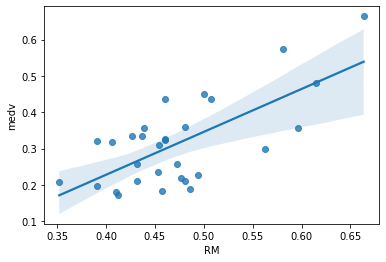

In [ ]:
sns.regplot(x="RM", y="medv", data=df_scaled.loc[21:50,:])

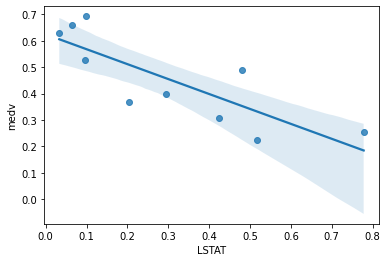

In [ ]:
sns.regplot(x="LSTAT", y="medv", data=df_scaled.loc[1:10,:])